#               Discrete Wavelet Transform (DWT)

This code is related to the following section of [the paper](https://arxiv.org/abs/2403.17181):

## Section II:  INTRODUCTION TO SIGNALS
### D.  Wavelet Transform
#### 2. Discrete Wavelet Transform (DWT)

For more details please refer to [the paper](https://arxiv.org/abs/2403.17181).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import loadtxt
import pywt
from scipy import signal
import scipy
from scipy.fft import fft, fftfreq
plt.rc('font',family='Times New Roman')
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Function to compute FFT:
def apply_fft(x, fs):
    N = len(x) # number of samples in the signal.
    T = 1.0 / fs
    fft_coef = fft(x-np.mean(x)) # Obtain FFT coefficients after removing the mean (DC component) from the signal.
    xf = fftfreq(N, T)[:N//2] # Taking positive spectrum only.
    fft_positve = 2.0/N * np.abs(fft_coef[0:N//2]) # Multiply  abs(FFT coefficients) by 2 to compensate for positive spectrum and normalize by signal length.
    return xf, fft_positve

In [3]:
# load vibration signal:
random_vib_signal = loadtxt('vib.csv', delimiter=',') 
num_samples_vib = len(random_vib_signal) # number of datapoints in the signal.
fs_vib = 64000 # sampling rate
t_vib = np.arange(0.0, num_samples_vib, 1.0)/fs_vib # time vector.

#The vibration signal extracted from the PU dataset: https://mb.uni-paderborn.de/en/kat/main-research/datacenter/bearing-datacenter/data-sets-and-download

In [4]:
# Available wavelet functions:
for family in pywt.families():
    print("%s family: " % family + ', '.join(pywt.wavelist(family)))

haar family: haar
db family: db1, db2, db3, db4, db5, db6, db7, db8, db9, db10, db11, db12, db13, db14, db15, db16, db17, db18, db19, db20, db21, db22, db23, db24, db25, db26, db27, db28, db29, db30, db31, db32, db33, db34, db35, db36, db37, db38
sym family: sym2, sym3, sym4, sym5, sym6, sym7, sym8, sym9, sym10, sym11, sym12, sym13, sym14, sym15, sym16, sym17, sym18, sym19, sym20
coif family: coif1, coif2, coif3, coif4, coif5, coif6, coif7, coif8, coif9, coif10, coif11, coif12, coif13, coif14, coif15, coif16, coif17
bior family: bior1.1, bior1.3, bior1.5, bior2.2, bior2.4, bior2.6, bior2.8, bior3.1, bior3.3, bior3.5, bior3.7, bior3.9, bior4.4, bior5.5, bior6.8
rbio family: rbio1.1, rbio1.3, rbio1.5, rbio2.2, rbio2.4, rbio2.6, rbio2.8, rbio3.1, rbio3.3, rbio3.5, rbio3.7, rbio3.9, rbio4.4, rbio5.5, rbio6.8
dmey family: dmey
gaus family: gaus1, gaus2, gaus3, gaus4, gaus5, gaus6, gaus7, gaus8
mexh family: mexh
morl family: morl
cgau family: cgau1, cgau2, cgau3, cgau4, cgau5, cgau6, cgau7, 

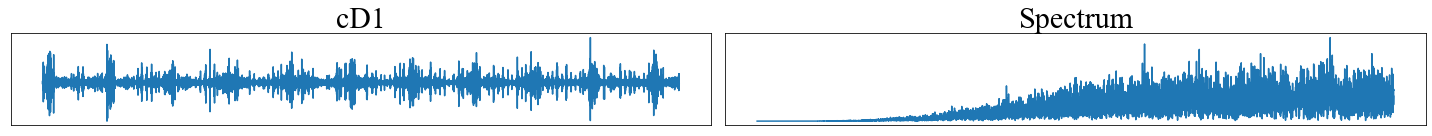

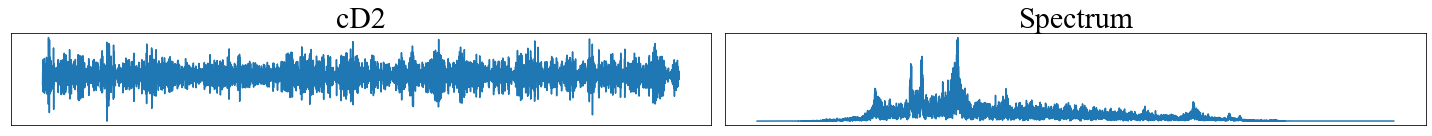

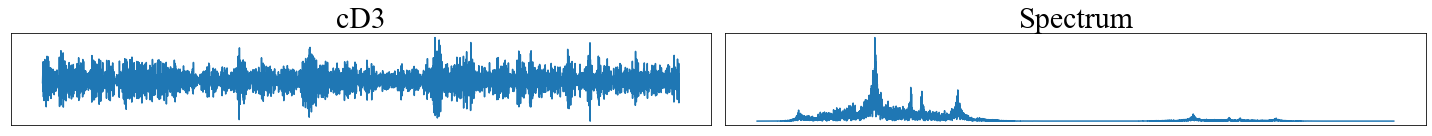

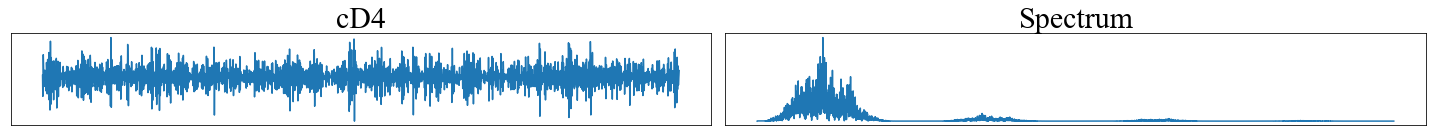

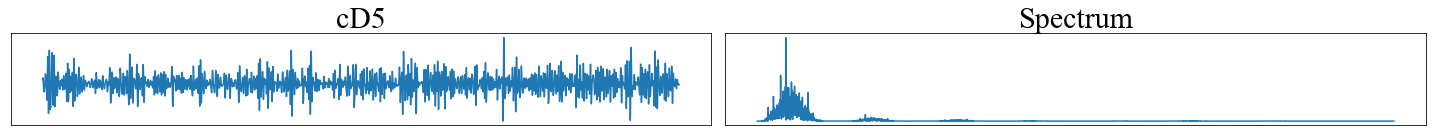

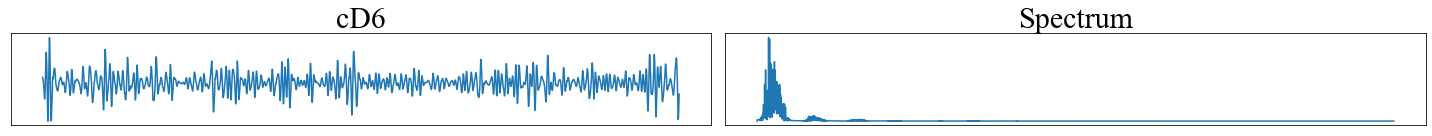

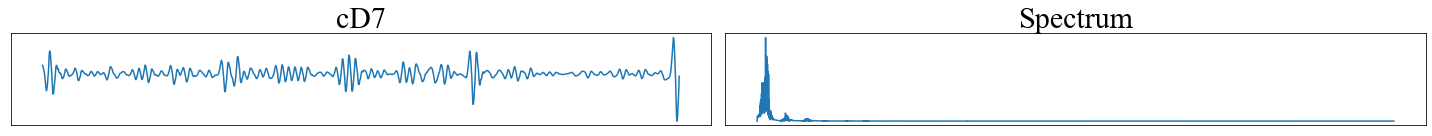

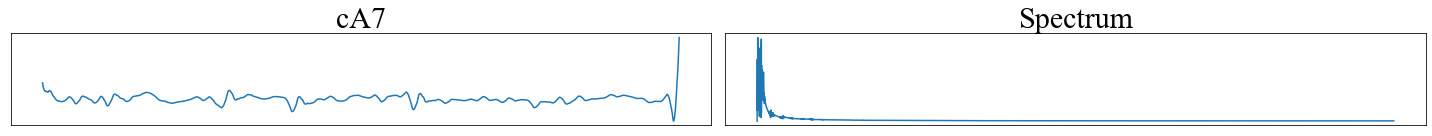

In [5]:
# DWT:

# Parameters:
levels = 7
wavelet_function = 'db4'

signal = random_vib_signal-np.mean(random_vib_signal)

# Decompose the signal using 3-level DWT
coeffs = pywt.wavedec(signal, wavelet_function, level= levels)


# Reconstruct individual elementary modes using the coefficients:
nodes = ['cA7', 'cD7', 'cD6', 'cD5', 'cD4', 'cD3', 'cD2', 'cD1'] # Nodes names.
rec_vib = 0
i = levels
elementary_modes = []
for j in range(levels+1):
    
    i = levels - j 
        
    # Create a copy of the coefficients
    coeffs_reconstructed = [np.zeros_like(c) for c in coeffs]
    # Set the coefficients for the current level to the original values
    coeffs_reconstructed[i] = coeffs[i]
    # Reconstruct the signal using the modified coefficients
    signal_reconstructed = pywt.waverec(coeffs_reconstructed, 'db4')
    # Append the reconstructed elementary mode to the list
    elementary_modes.append(signal_reconstructed)

    # Apply FFT to obtain spectrum of the reconstructed elementary mode:
    f_, fft_ = apply_fft(signal_reconstructed, fs_vib)
    
    
    #Plotting
    plt.figure(figsize=(20, 2))
    # Time domain plot
    plt.subplot(1, 2, 1)
    plt.plot(signal_reconstructed)
    plt.title(f'{nodes[i]}', fontsize = 30)
    plt.xticks([]) 
    plt.yticks([]) 
    # Frequency domain plot
    plt.subplot(1, 2, 2)
    plt.plot(fft_)
    plt.title('Spectrum', fontsize = 30)
    plt.xticks([]) 
    plt.yticks([]) 
    plt.tight_layout()
    plt.show()